<a href="https://colab.research.google.com/github/TruongTrungQuan20146404/Truong_Trung_Quan_20146404/blob/main/Mobile_robot_10_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# input  3 đầu vào (cảm biến L,C,R)
# output 2 đầu ra (2 động cơ) (0-255)


In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=075a0ca78ab22a9fe42178581d7afe51d2dbbb659b37e9bdeef790b863c47acb
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-13-dc42de8667e5>:60: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-13-dc42de8667e5>:61: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-13-dc42de8667e5>:62: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


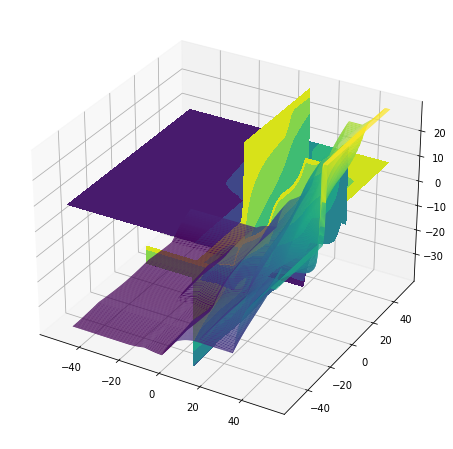

In [ ]:
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl


from networkx.algorithms.bipartite import projection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(-50,50,101)
universe1 = np.linspace(-90,270,101)
universe2 = np.linspace(-45,45,101)

position  = ctrl.Antecedent(universe,'position')
truck_angle = ctrl.Antecedent(universe1,'truck_angle')
steering_angle = ctrl.Consequent(universe2,'steering_angle')

name = ['LE','LC','CE','RC','RI']
name1 = ['RL','RU','RV','VE','LV','LU','LL']
name2 = ['NL','NM','NS','ZE','PS','PM','PL']

position.automf(names=name)
truck_angle.automf(names =name1)
steering_angle.automf(names = name2)

rule1 = ctrl.Rule(antecedent=((position['LE']&truck_angle['RL'])|(position['LC']&truck_angle['RL'])|(position['LE']&truck_angle['RU'])|(position['LC']&truck_angle['RU'])|(position['LE']&truck_angle['RV'])),consequent=steering_angle['NL'],label='rule NL')
rule2 = ctrl.Rule(antecedent=((position['CE']&truck_angle['RL'])|(position['RC']&truck_angle['RL'])|(position['CE']&truck_angle['RU'])|(position['LC']&truck_angle['RV'])|(position['LC']&truck_angle['VE'])|(position['LE']&truck_angle['VE'])|(position['LE']&truck_angle['LV'])),consequent=steering_angle['NM'],label='rule NM')
rule3 = ctrl.Rule(antecedent=((position['RI']&truck_angle['RL'])|(position['RC']&truck_angle['RU'])|(position['CE']&truck_angle['RV'])|(position['LC']&truck_angle['LV'])|(position['LE']&truck_angle['LU'])),consequent=steering_angle['NS'],label='rule NS')
rule4 = ctrl.Rule(antecedent=((position['CE']&truck_angle['VE'])),consequent=steering_angle['ZE'],label='rule ZE')
rule5 = ctrl.Rule(antecedent=((position['RI']&truck_angle['RL'])|(position['RC']&truck_angle['RV'])|(position['CE']&truck_angle['LV'])|(position['LC']&truck_angle['LU'])|(position['LC']&truck_angle['LL'])),consequent=steering_angle['PS'],label='rule PS')
rule6 = ctrl.Rule(antecedent=((position['RI']&truck_angle['RV'])|(position['RI']&truck_angle['VE'])|(position['RC']&truck_angle['VE'])|(position['RC']&truck_angle['LV'])|(position['CE']&truck_angle['LU'])|(position['CE']&truck_angle['LL'])|(position['LC']&truck_angle['LL'])),consequent=steering_angle['PM'],label='rule PM')
rule7 = ctrl.Rule(antecedent=((position['RI']&truck_angle['LV'])|(position['RI']&truck_angle['LU'])|(position['RC']&truck_angle['LU'])|(position['RI']&truck_angle['LL'])|(position['RC']&truck_angle['LL'])),consequent=steering_angle['PL'],label='rule PL')


steering_angleping_ctrl= ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5,rule6,rule7])
sim= ctrl.ControlSystemSimulation(steering_angleping_ctrl,flush_after_run=200*200+1)

upsampled = np.linspace(-50,50,200)
upsampled1 = np.linspace(-90,270,500)


x,y = np.meshgrid(upsampled,upsampled)
x1,y1 = np.meshgrid(upsampled1,upsampled1)

z = np.zeros_like(x)

for i in range(200):
  for j in range(200):
    sim.input['position'] = x[i,j]
    sim.input['position'] = x1[i,j]
    sim.input['truck_angle']=y[i,j]
    sim.input['truck_angle']=y1[i,j]
    sim.compute()
    z[i,j] = sim.output['steering_angle']

fig = plt.figure(figsize=(8,8))
ax =fig.add_subplot(111,projection='3d')

suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)

cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)

ax.view_init(30,300)